Exercice du cour [https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/6774321-entrainez-vous-a-classer-automatiquement-des-feuilles-d-arbres]()

explication du dataset ici [https://www.kaggle.com/c/leaf-classification/data]()


notes: 

classifier multiclass : sklearn.multiclass.OneVsRestClassifier



In [89]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

data_raw = pd.read_csv('Dataset_feuilles_train.csv')

In [90]:
data_raw.shape

(990, 194)

In [91]:
data_raw.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [92]:
data_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.0,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.0,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.0,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.0,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.0,0.005859,0.013672,0.029297,0.169920
...,...,...,...,...,...,...,...,...
texture60,990.0,0.014017,0.060151,0.0,0.000000,0.000000,0.000000,0.578130
texture61,990.0,0.002688,0.011415,0.0,0.000000,0.000000,0.000000,0.151370
texture62,990.0,0.020291,0.039040,0.0,0.000000,0.003906,0.023438,0.375980
texture63,990.0,0.008989,0.013791,0.0,0.000000,0.002930,0.012695,0.086914


In [93]:
data_raw.dtypes.value_counts()

float64    192
int64        1
object       1
dtype: int64

In [94]:
X = data_raw.iloc[:,2:].values
y_raw = data_raw.iloc[:,1]

In [95]:
# encodage des données lettres en chiffres
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y = labelencoder.fit_transform(y_raw)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Classification baseline par KNN

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

knn = OneVsRestClassifier(KNeighborsClassifier())
knn.get_params().keys()

dict_keys(['estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'n_jobs'])

In [98]:

params = {'estimator__n_neighbors': [2, 3, 5, 7, 9, 11]}

knn_gs = GridSearchCV(knn, params, cv=5)
knn_gs.fit(X_train, y_train)

print(knn_gs.best_params_)


{'estimator__n_neighbors': 2}


In [99]:
from sklearn.metrics import accuracy_score
y_prob = knn_gs.predict_proba(X_test)
y_prob.shape
y_pred = knn_gs.predict(X_test)
y_pred.shape
accuracy_score(y_test, y_pred)

0.8103975535168195

In [100]:
knn_gs.score(X_test, y_test)

0.8103975535168195

In [101]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score, auc
# y_prob_labels = np.argmax(y_prob, axis=1) #transform y_prob one-hot-encoder to colum array with encoded values
# y_prob_labels.shape

# roc_auc_score(y_test, y_prob, multi_class='ovo', average='weighted')

In [102]:
fpr = {}
tpr = {}
thresh ={}
for i in range(y_prob.shape[1]):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob[:,i], pos_label=i)

Text(0, 0.5, 'True Positive rate')

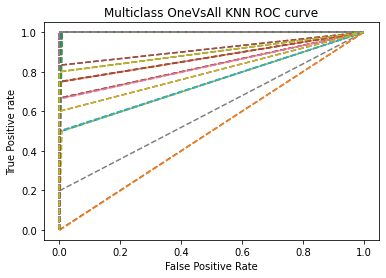

In [103]:
from sklearn import metrics
import matplotlib.pyplot as plt

for i in range(y_prob.shape[1]):
	plt.plot(fpr[i], tpr[i], linestyle='--',label=f'Class {i} vs Rest')

plt.title('Multiclass OneVsAll KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
# plt.legend(loc='best')  

note : 
comparer les resultat  / roc / auc entre les features 
comparer la "correlation" entre les classes : certaines classes peuvent etre tres proches, donc difficiles à différencier pour le modele.

## SVM Multiclass

In [104]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

lsvc = OneVsRestClassifier(LinearSVC())
# lsvc = OneVsRestClassifier(SVC(kernel='linear'))
lsvc.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__loss', 'estimator__max_iter', 'estimator__multi_class', 'estimator__penalty', 'estimator__random_state', 'estimator__tol', 'estimator__verbose', 'estimator', 'n_jobs'])

In [105]:
params = {'estimator__C': np.logspace(1, 3, 7)}

lsvc_gs = GridSearchCV(lsvc, params, cv=5)
y_score = lsvc_gs.fit(X_train, y_train).decision_function(X_test) #use of decision function to get the 'probabilities', instead of 'predict'
# The desion function tells us on which side of the hyperplane generated by the classifier we are (and how far we are away from it). 
# Based on that information, the estimator then label the examples with the corresponding label.

print(lsvc_gs.best_params_)
print(y_score)

{'estimator__C': 464.15888336127773}
[[-2.73923261 -0.99630311 -3.15796849 ... -3.113975   -2.60210579
  -3.76590517]
 [-4.77272636 -2.74036163 -3.80997306 ... -2.19267981 -1.60387205
  -1.98842668]
 [-2.10783732  0.80161519 -2.46949863 ... -3.53525512 -2.6222124
  -1.49868672]
 ...
 [-3.11891003 -1.88972206 -1.73956894 ... -3.69719585 -3.14430736
  -2.57525617]
 [-3.4044673  -2.67227221 -3.39237404 ... -2.7293431  -3.18114125
  -3.51330476]
 [-2.51781861 -2.13248379 -1.77344289 ... -1.98639663 -2.51179344
  -1.75250442]]


In [106]:
y_pred = lsvc_gs.predict(X_test)
y_pred.shape

(327,)

In [107]:
lsvc_gs.score(X_test, y_test)

0.9204892966360856

In [108]:
lsvc_gs.best_score_

0.9321257689678741

In [109]:
lsvc_gs.estimator

OneVsRestClassifier(estimator=LinearSVC())

In [110]:
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
for i in range(y_score.shape[1]):
	fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_score[:,i], pos_label=i)
	roc_auc[i] = auc(fpr[i], tpr[i])

Text(0, 0.5, 'True Positive rate')

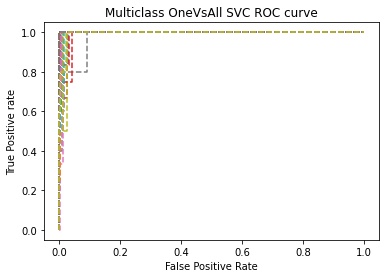

In [111]:
for i in range(y_score.shape[1]):
	plt.plot(fpr[i], tpr[i], linestyle='--',label=f'Class {i} vs Rest')

plt.title('Multiclass OneVsAll SVC ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

In [112]:
# why predict proba doesn't exists for this classifier ?
# lsvc.predict_proba(X_test)
# without it, we can't use this function
# roc_auc_score(y_test, y_score)

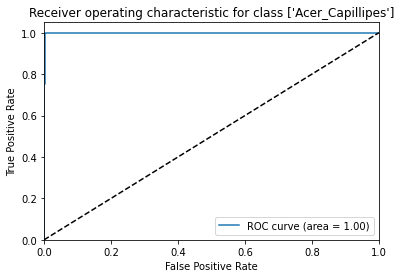

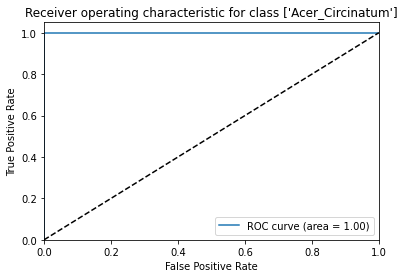

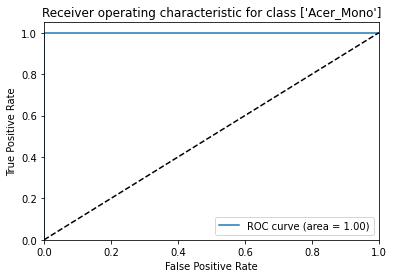

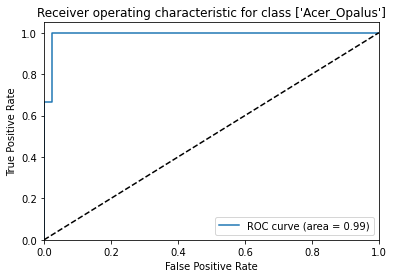

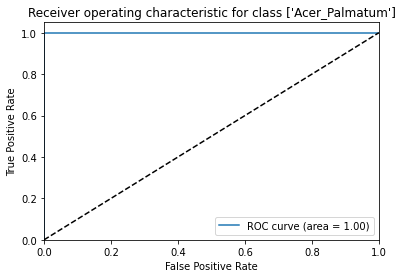

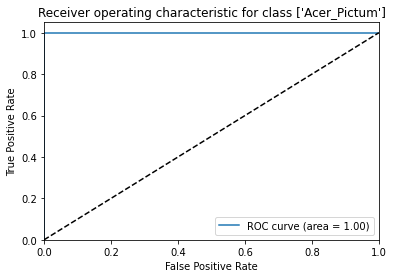

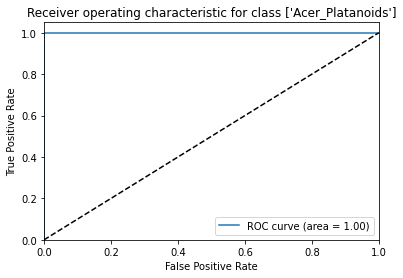

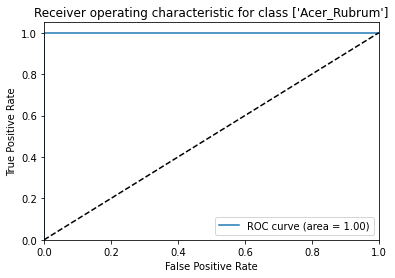

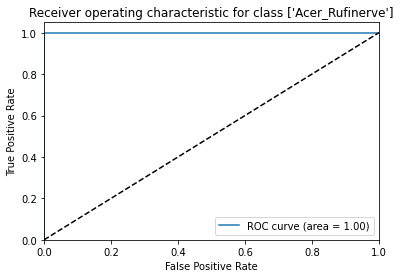

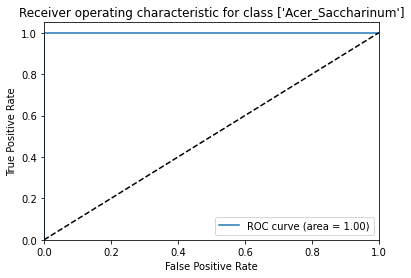

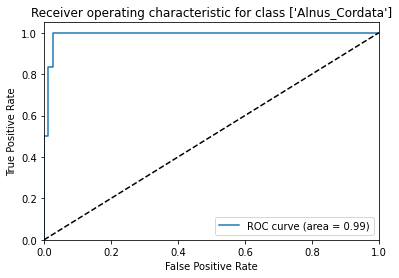

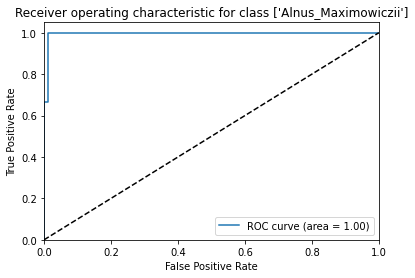

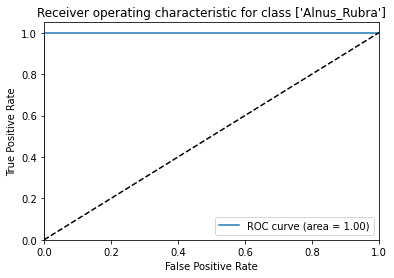

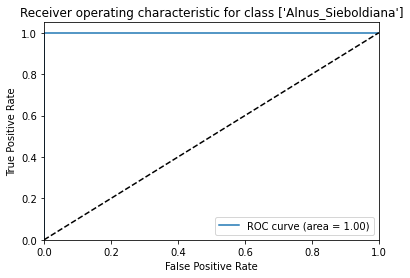

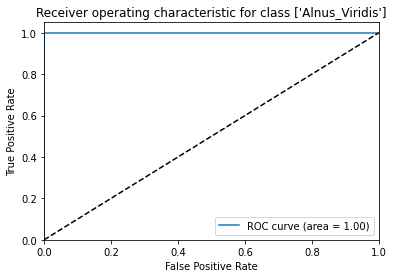

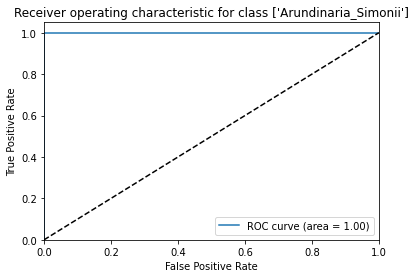

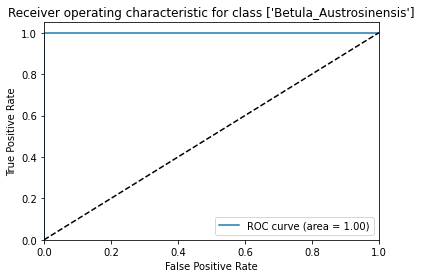

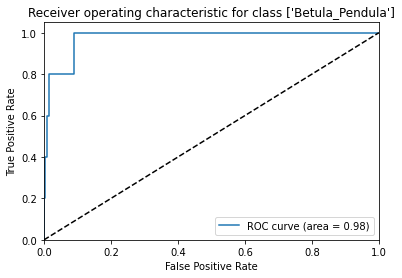

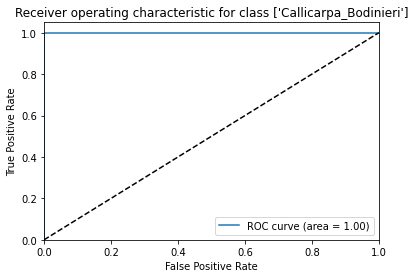

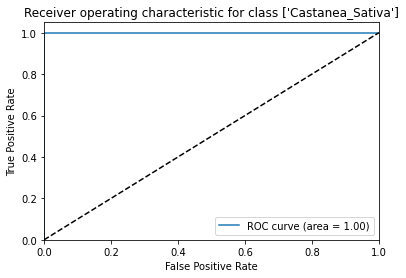

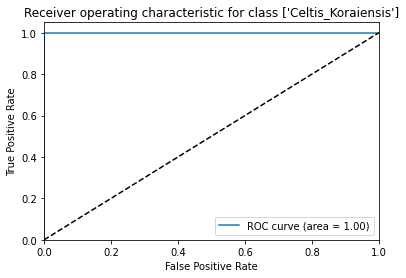

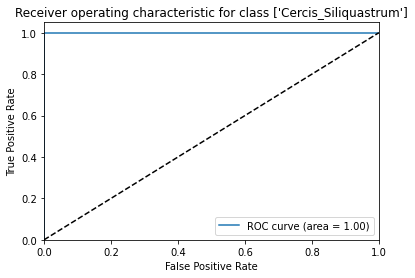

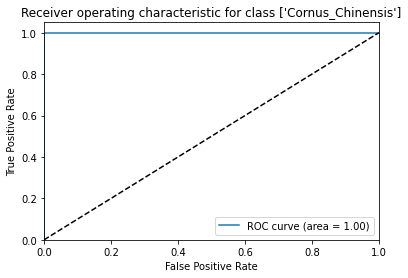

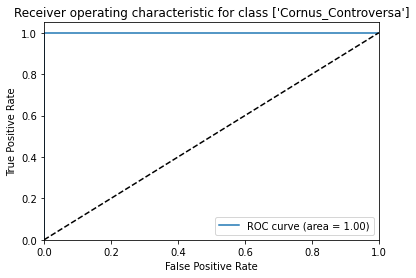

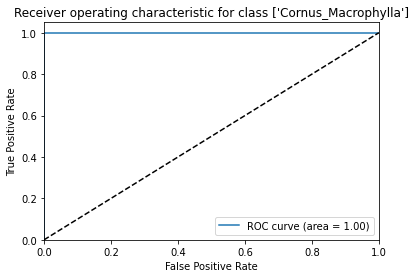

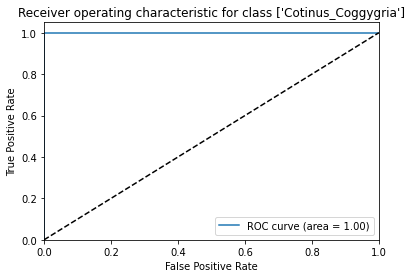

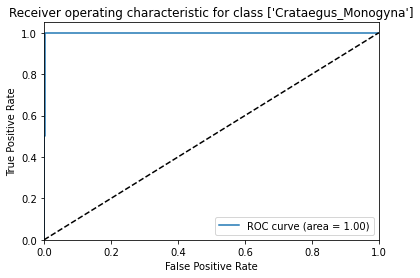

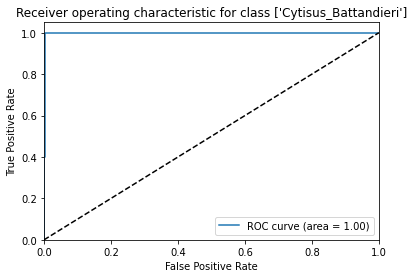

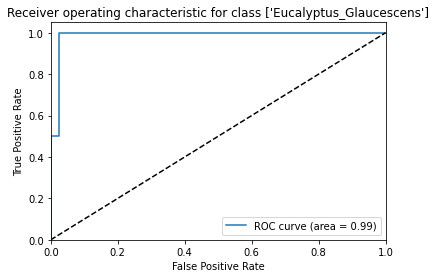

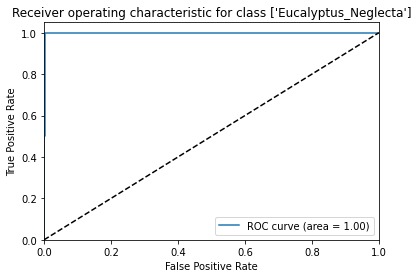

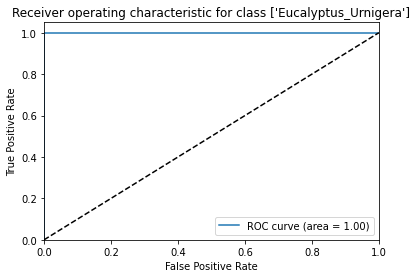

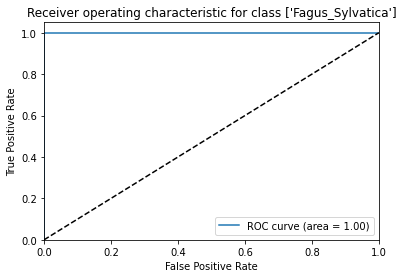

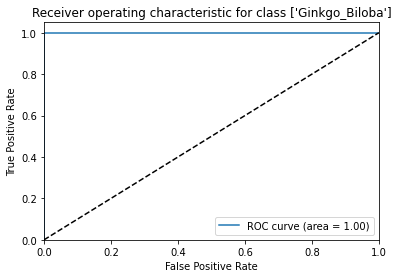

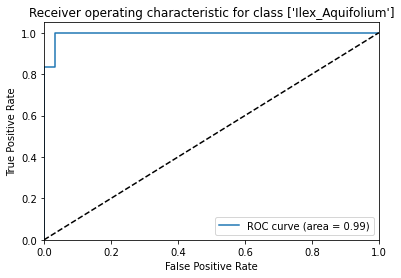

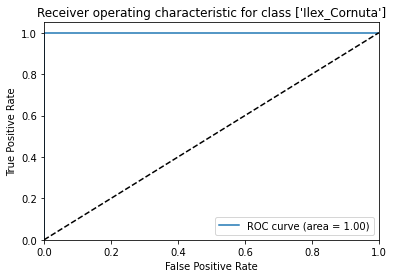

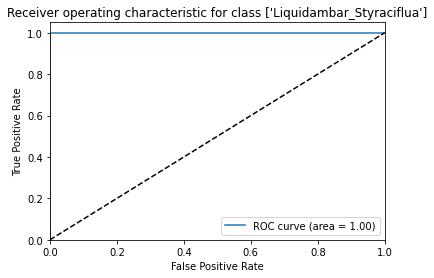

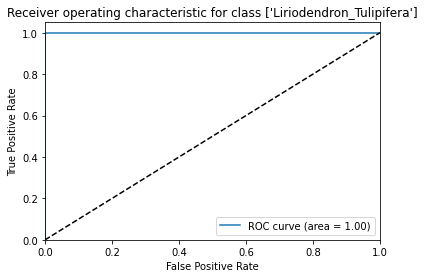

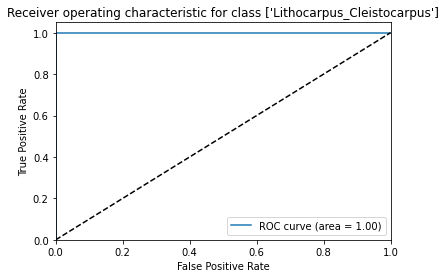

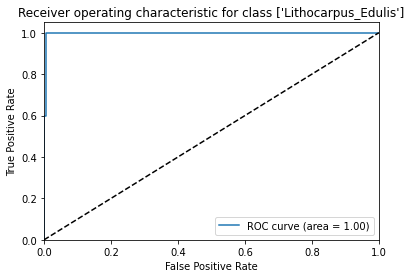

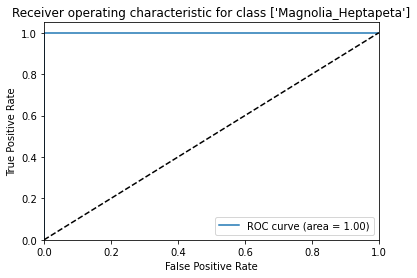

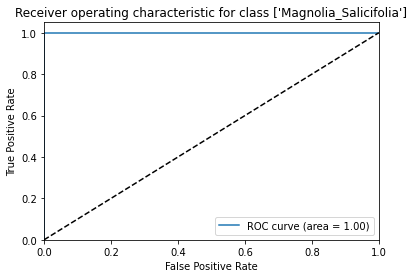

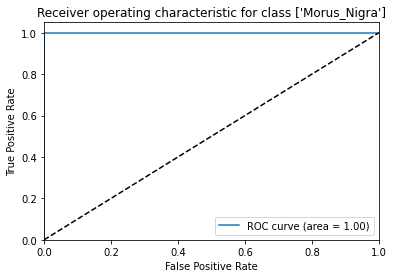

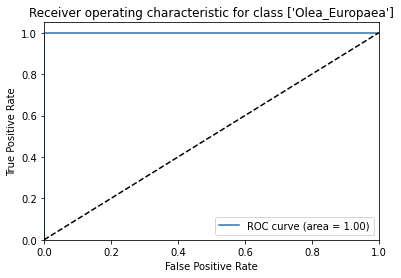

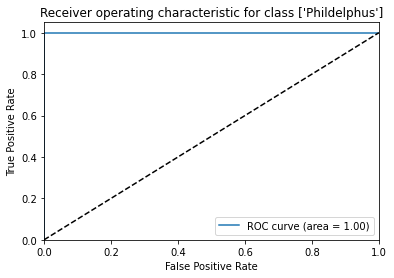

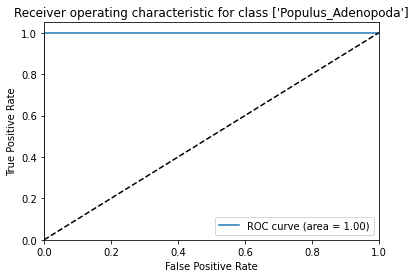

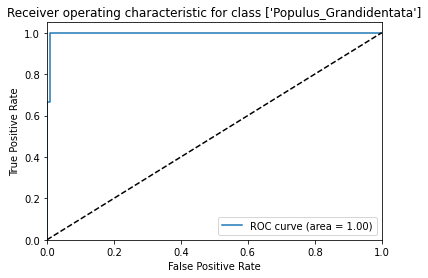

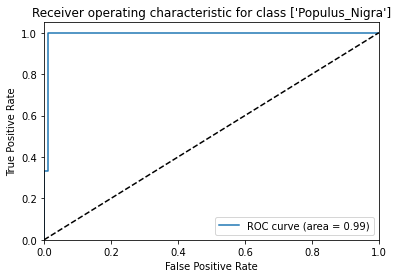

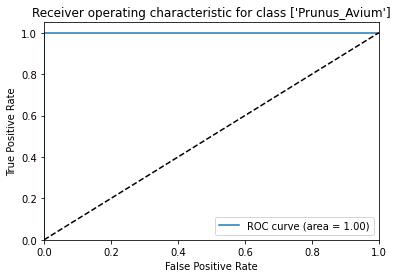

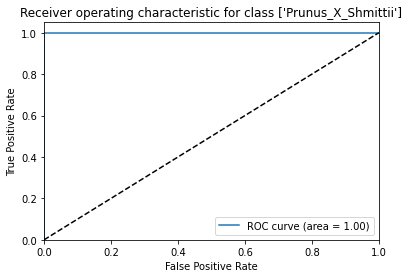

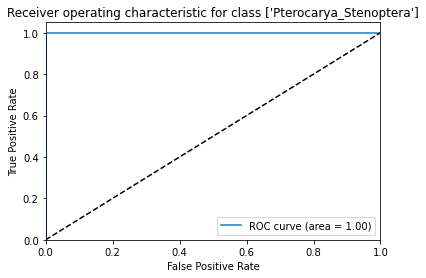

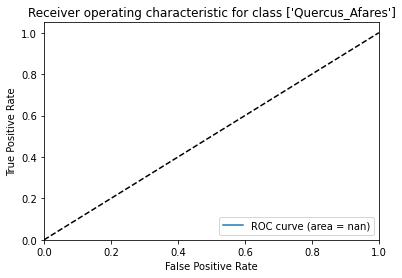

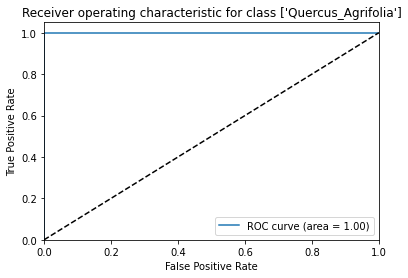

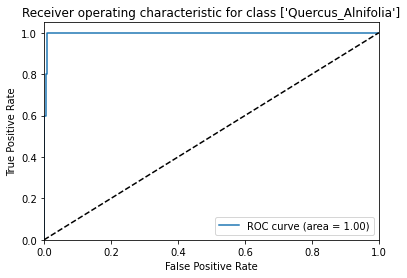

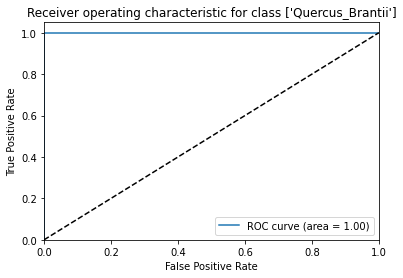

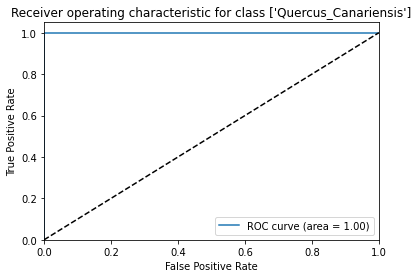

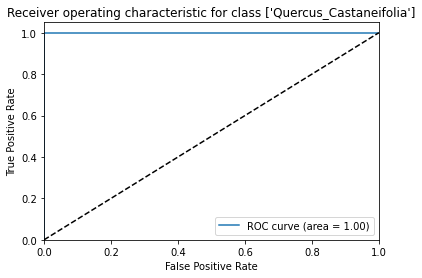

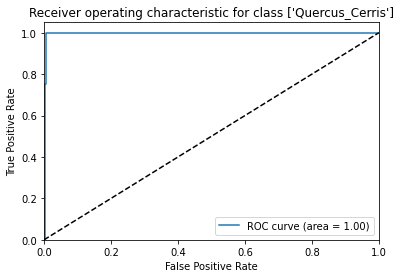

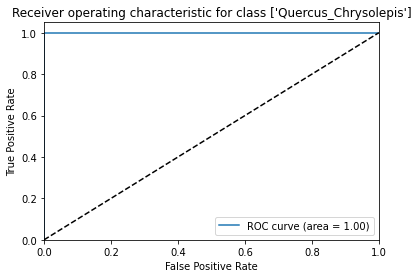

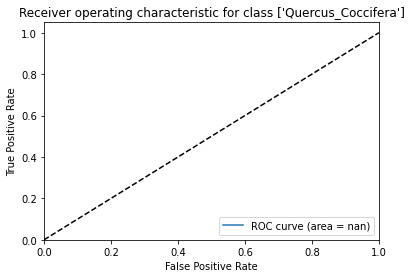

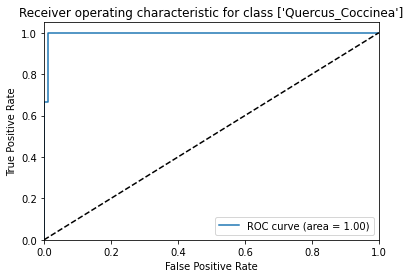

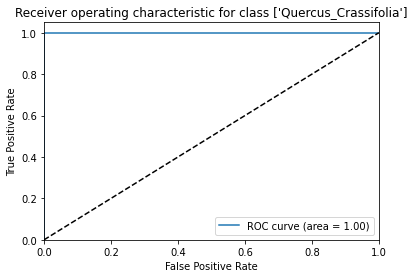

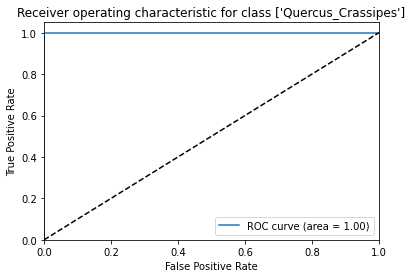

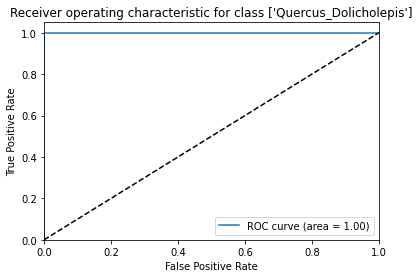

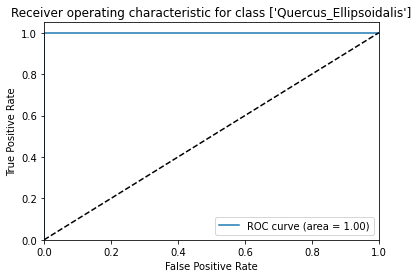

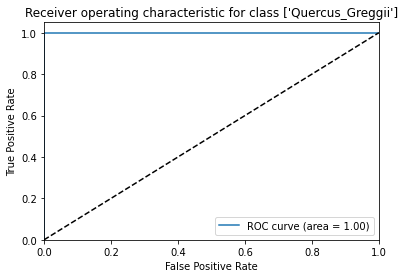

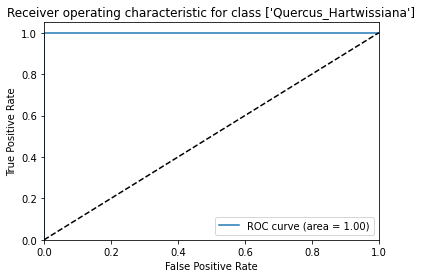

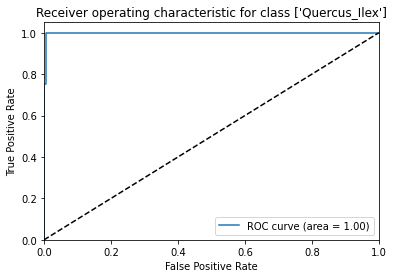

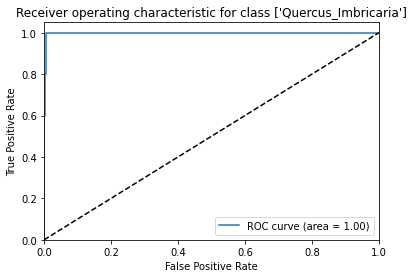

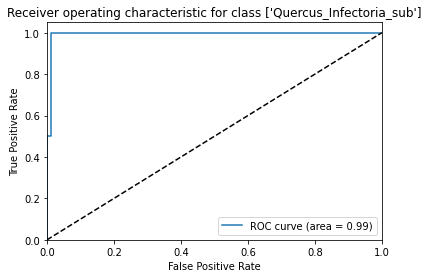

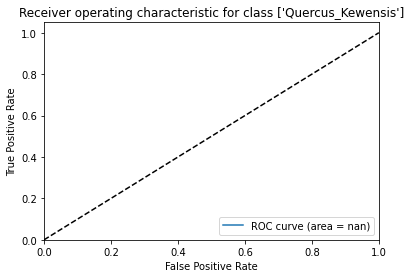

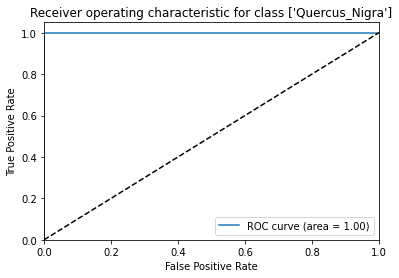

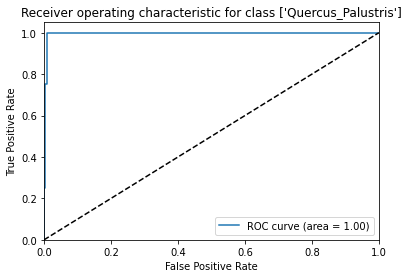

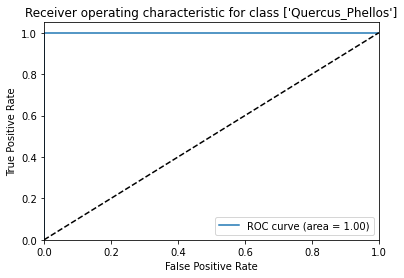

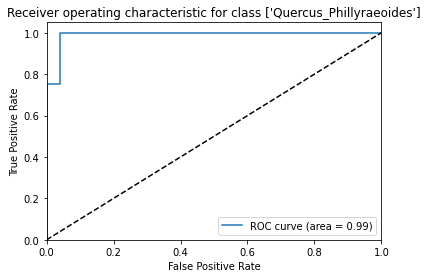

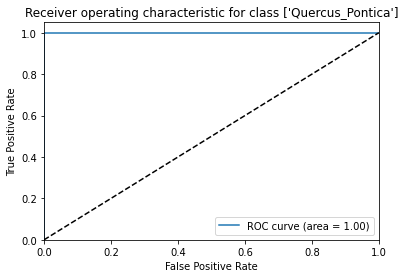

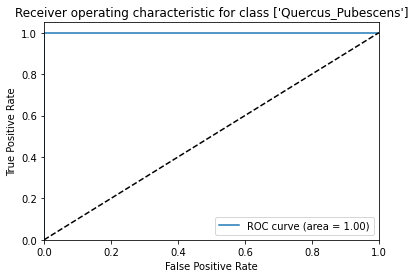

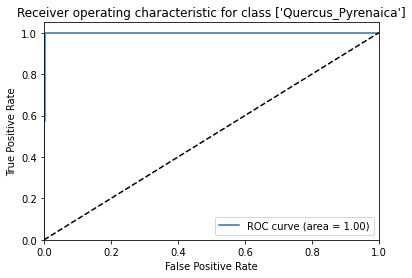

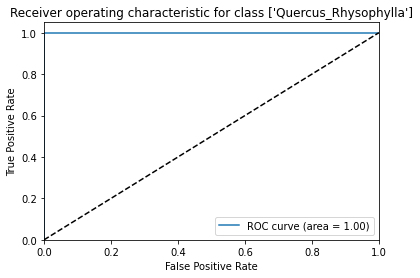

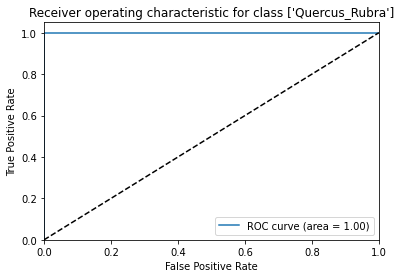

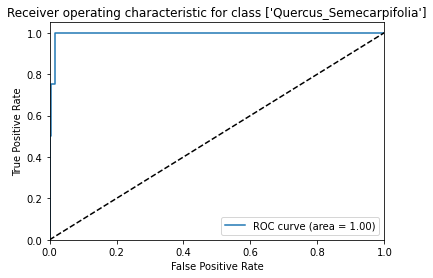

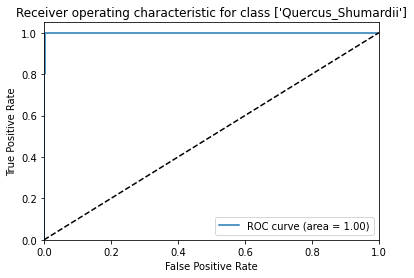

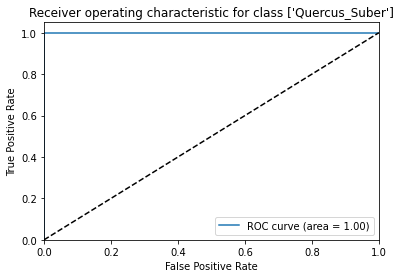

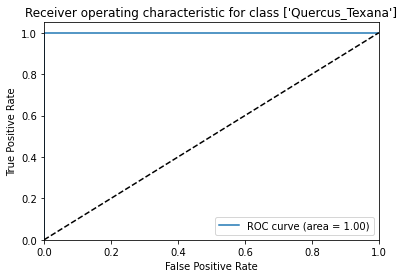

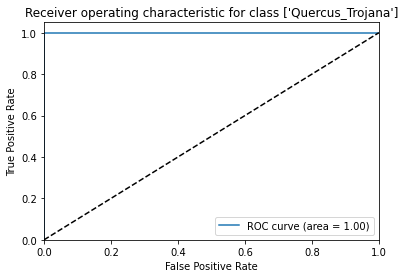

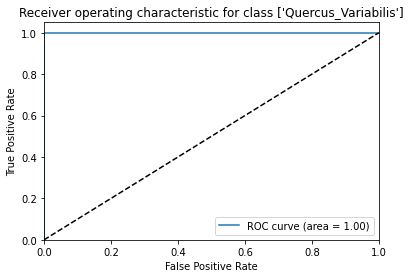

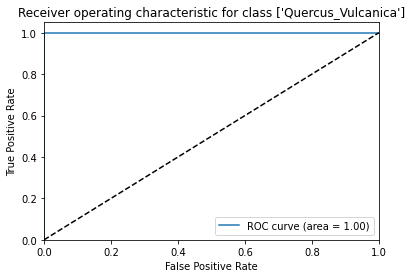

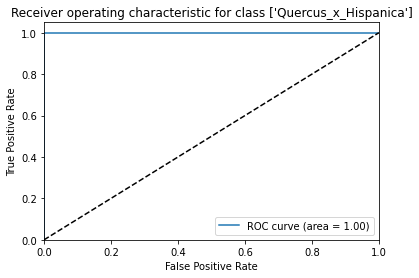

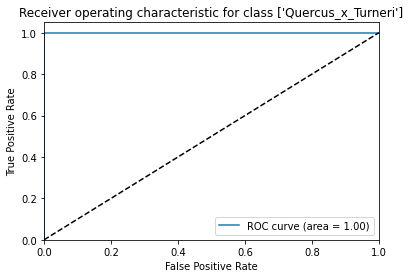

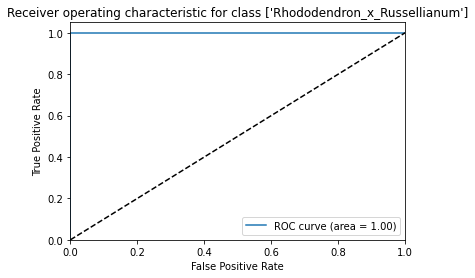

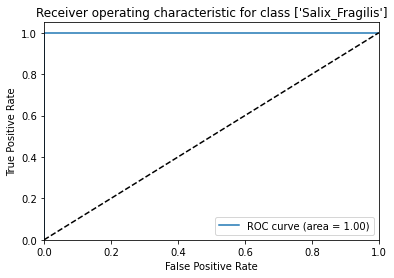

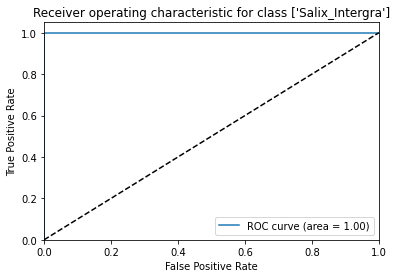

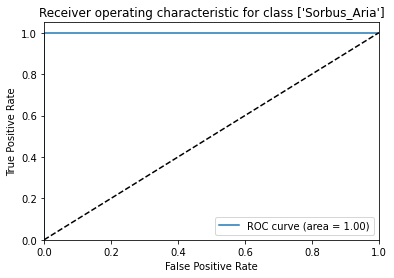

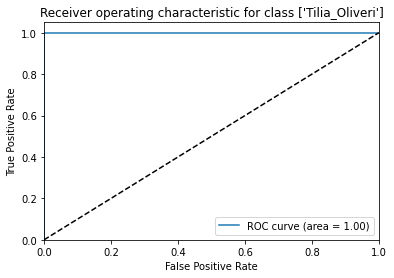

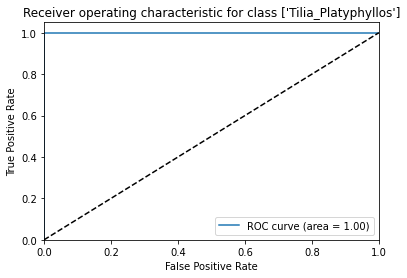

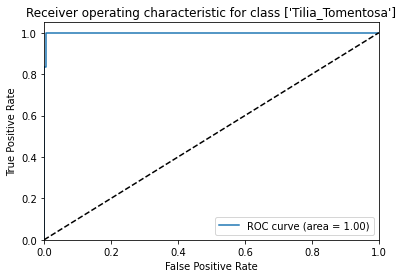

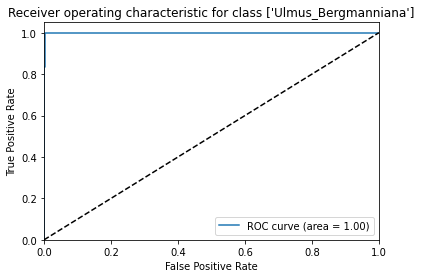

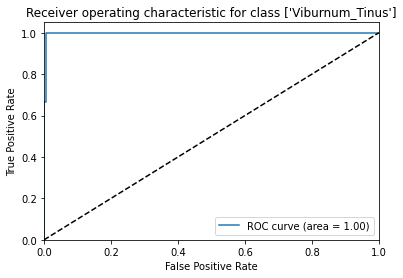

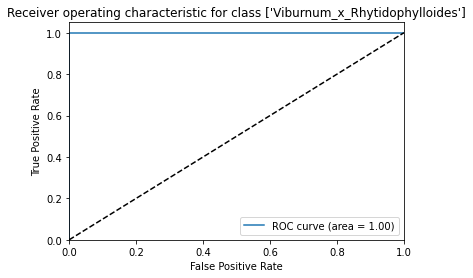

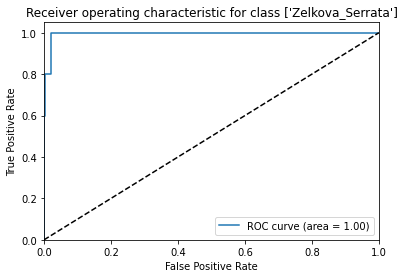

In [113]:
# Plot of a ROC curve for a specific class
for i in range(y_score.shape[1]):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver operating characteristic for class {labelencoder.inverse_transform([i])}')
    plt.legend(loc="lower right")
    plt.show()

In [114]:
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=17)
tpr

array([0. , 0. , 0. , 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1. , 1. ])

In [115]:
range(y_score.shape[1])

range(0, 99)

In [116]:
np.min(np.abs(y_score[0]))

0.25045377471020513